In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
%matplotlib inline
# plt.style.use('fivethirtyeight')
# plt.rcParams.update({'font.size':12})

In [108]:
path = ''
wine_150k = pd.read_csv(path + 'winemag-data_first150k.csv',index_col=0)
wine_130k = pd.read_csv(path + 'winemag-data-130k-v2.csv',index_col=0)
wine = pd.concat([wine_150k,wine_130k],axis=0)
#wine = wine_150k
print("Number of rows and columns:",wine.shape)

('Number of rows and columns:', (280901, 13))


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [109]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

In [110]:
wine1 = wine.copy()

In [111]:
# Lets choice rating of wine is points, title as user_id, and variety,
col = ['province','variety','points']
wine1 = wine[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] >85]
wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)

In [112]:
wine_pivot.head()

province,Achaia,Aconcagua Costa,Aconcagua Valley,Aegean,Agioritikos,Ahr,Aigialias Slopes,Alenquer,Alentejano,Alentejo,...,Wellington,Western Australia,Western Cape,Wiener Gemischter Satz,Württemberg,Zenata,Österreichischer Perlwein,Österreichischer Sekt,Štajerska,Župa
variety,,,,,,,,,,,,,,,,,,,,,
Abouriou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agiorgitiko,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aglianico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albanello,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
knn = NearestNeighbors(n_neighbors=10,algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

In [114]:
query_index = np.random.choice(wine_pivot.shape[0])
distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recmmendation for {0}:\n'.format(wine_pivot.index[query_index]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))

Recmmendation for Vignoles:

1: Pinot Grigio-Sauvignon Blanc with distance: 0.416114064587
2: Chardonnay-Riesling with distance: 0.416114064587
3: Marquette with distance: 0.416114064587
4: Riesling-Chardonnay with distance: 0.416114064587
5: Traminette with distance: 0.416114064587


In [115]:
indice

array([[634, 406, 119, 285, 450, 597]])

In [116]:
df_wines = wine.copy()

In [117]:
df_wines['log_price'] = np.log(df_wines['price'])

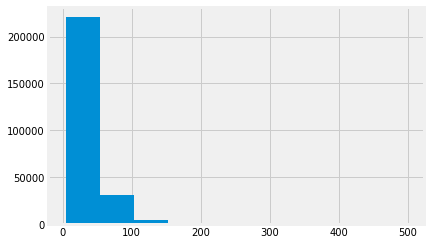

In [118]:
df_wines[df_wines['price']<500]['price'].hist()

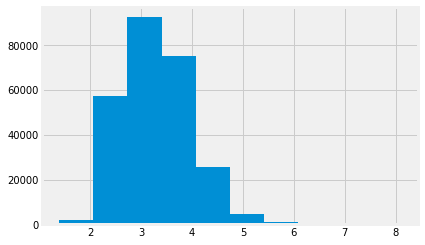

In [119]:
df_wines['log_price'].hist()

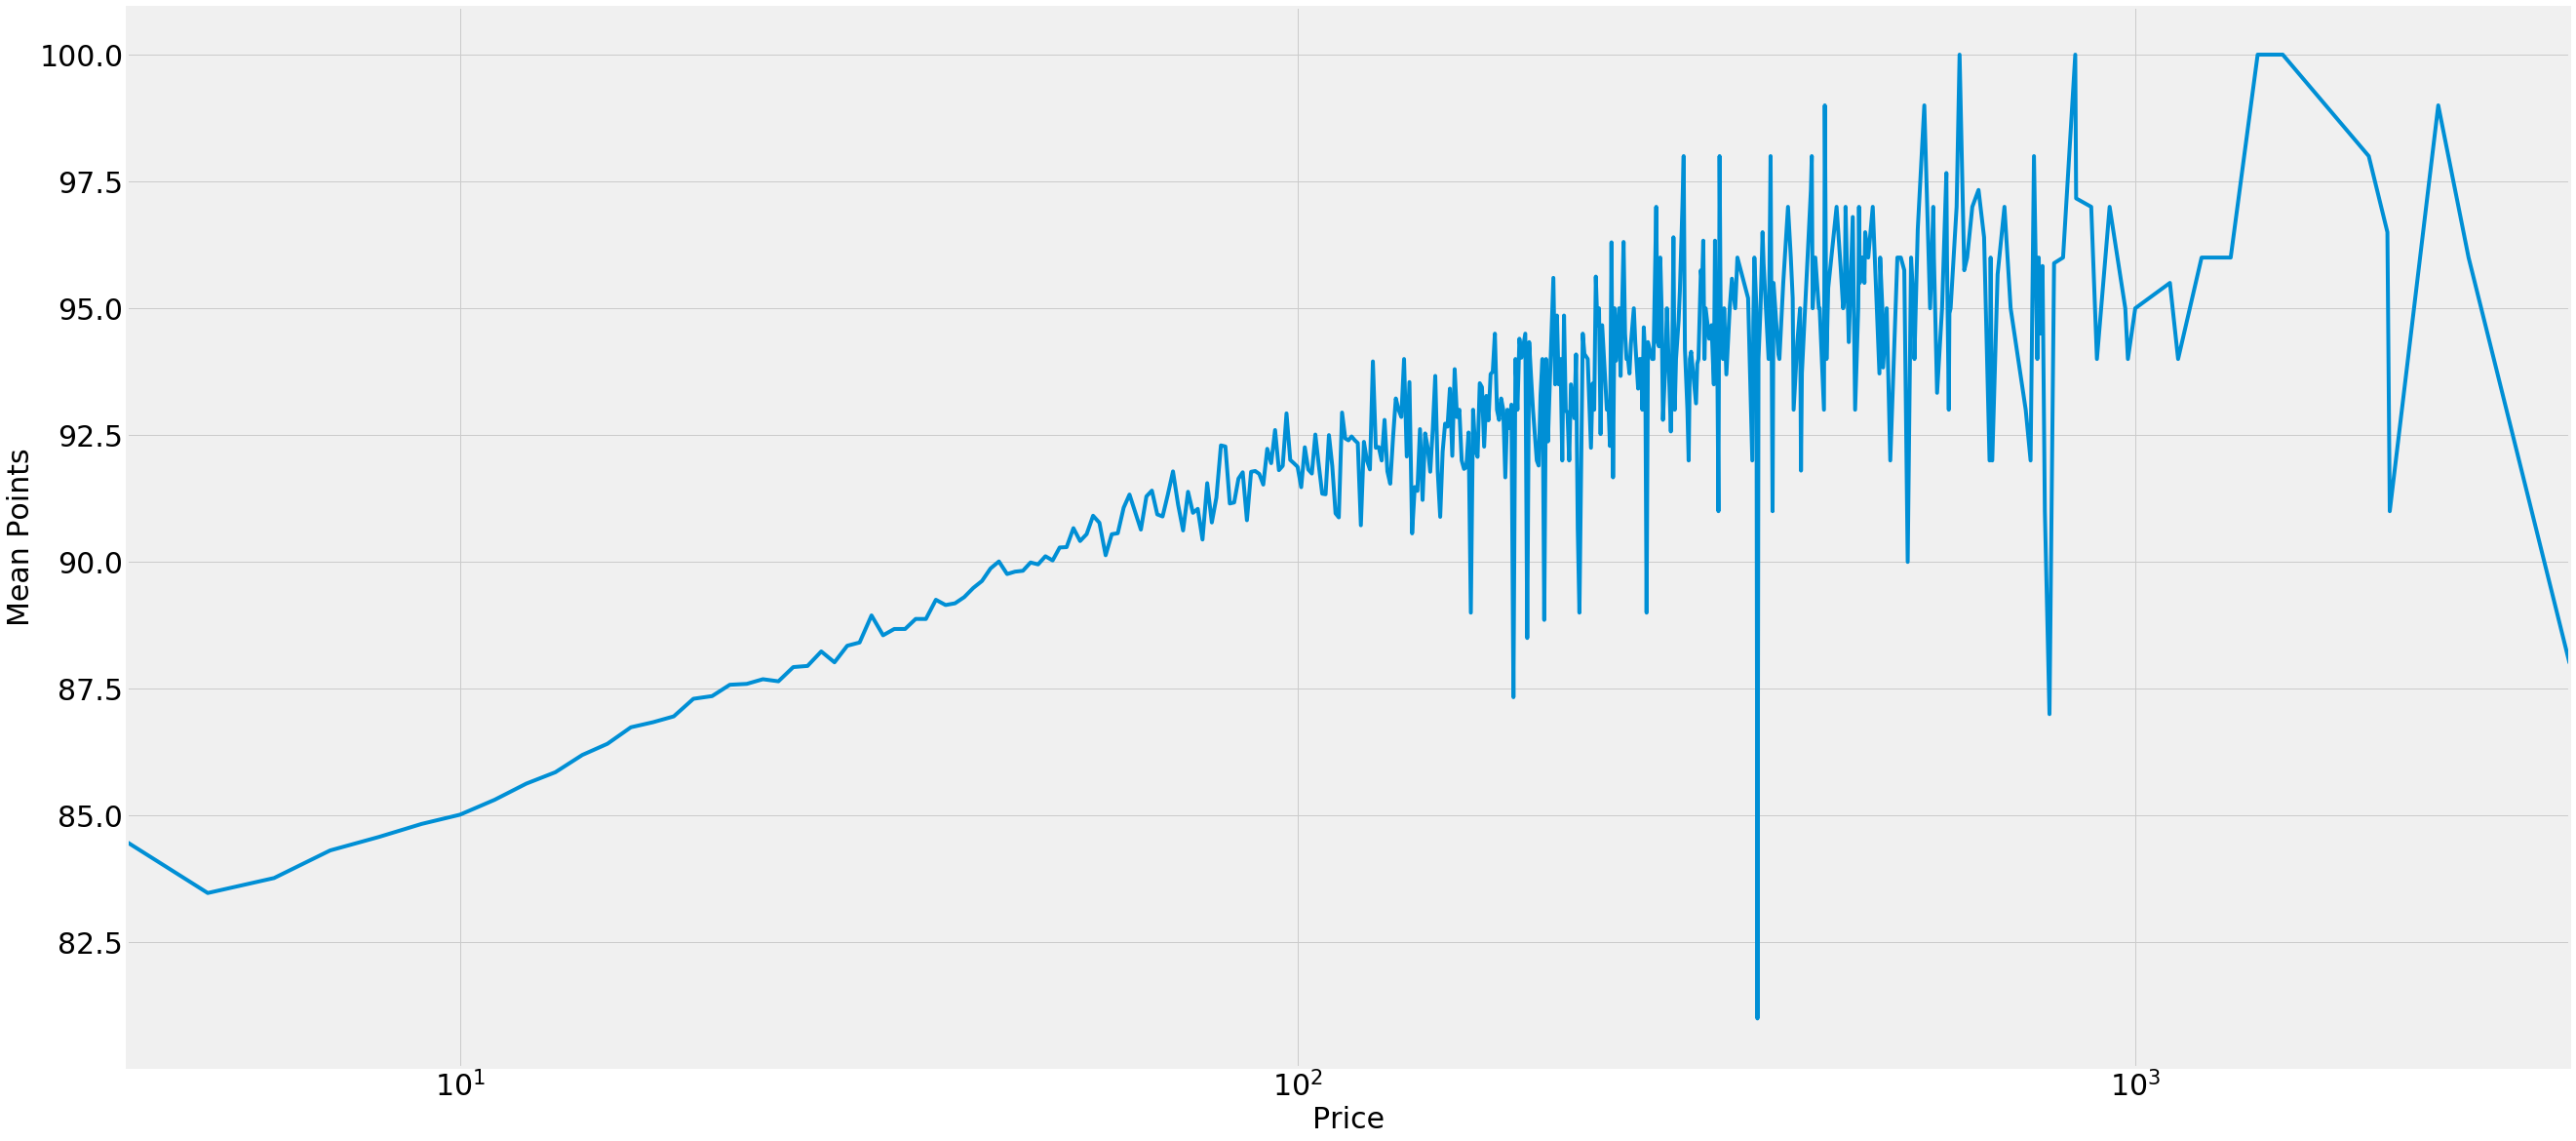

In [120]:
plt.figure()
df_wines.groupby(['price'])['points'].mean().plot(figsize=(40,20), fontsize = 30, logx = True)
plt.xlabel('Price', fontsize = 30)
plt.ylabel('Mean Points', fontsize = 30)
plt.show()

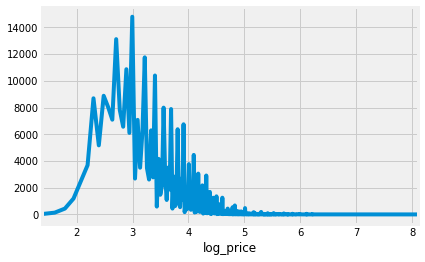

In [121]:
df_wines.groupby(['log_price'])['points'].count().plot()

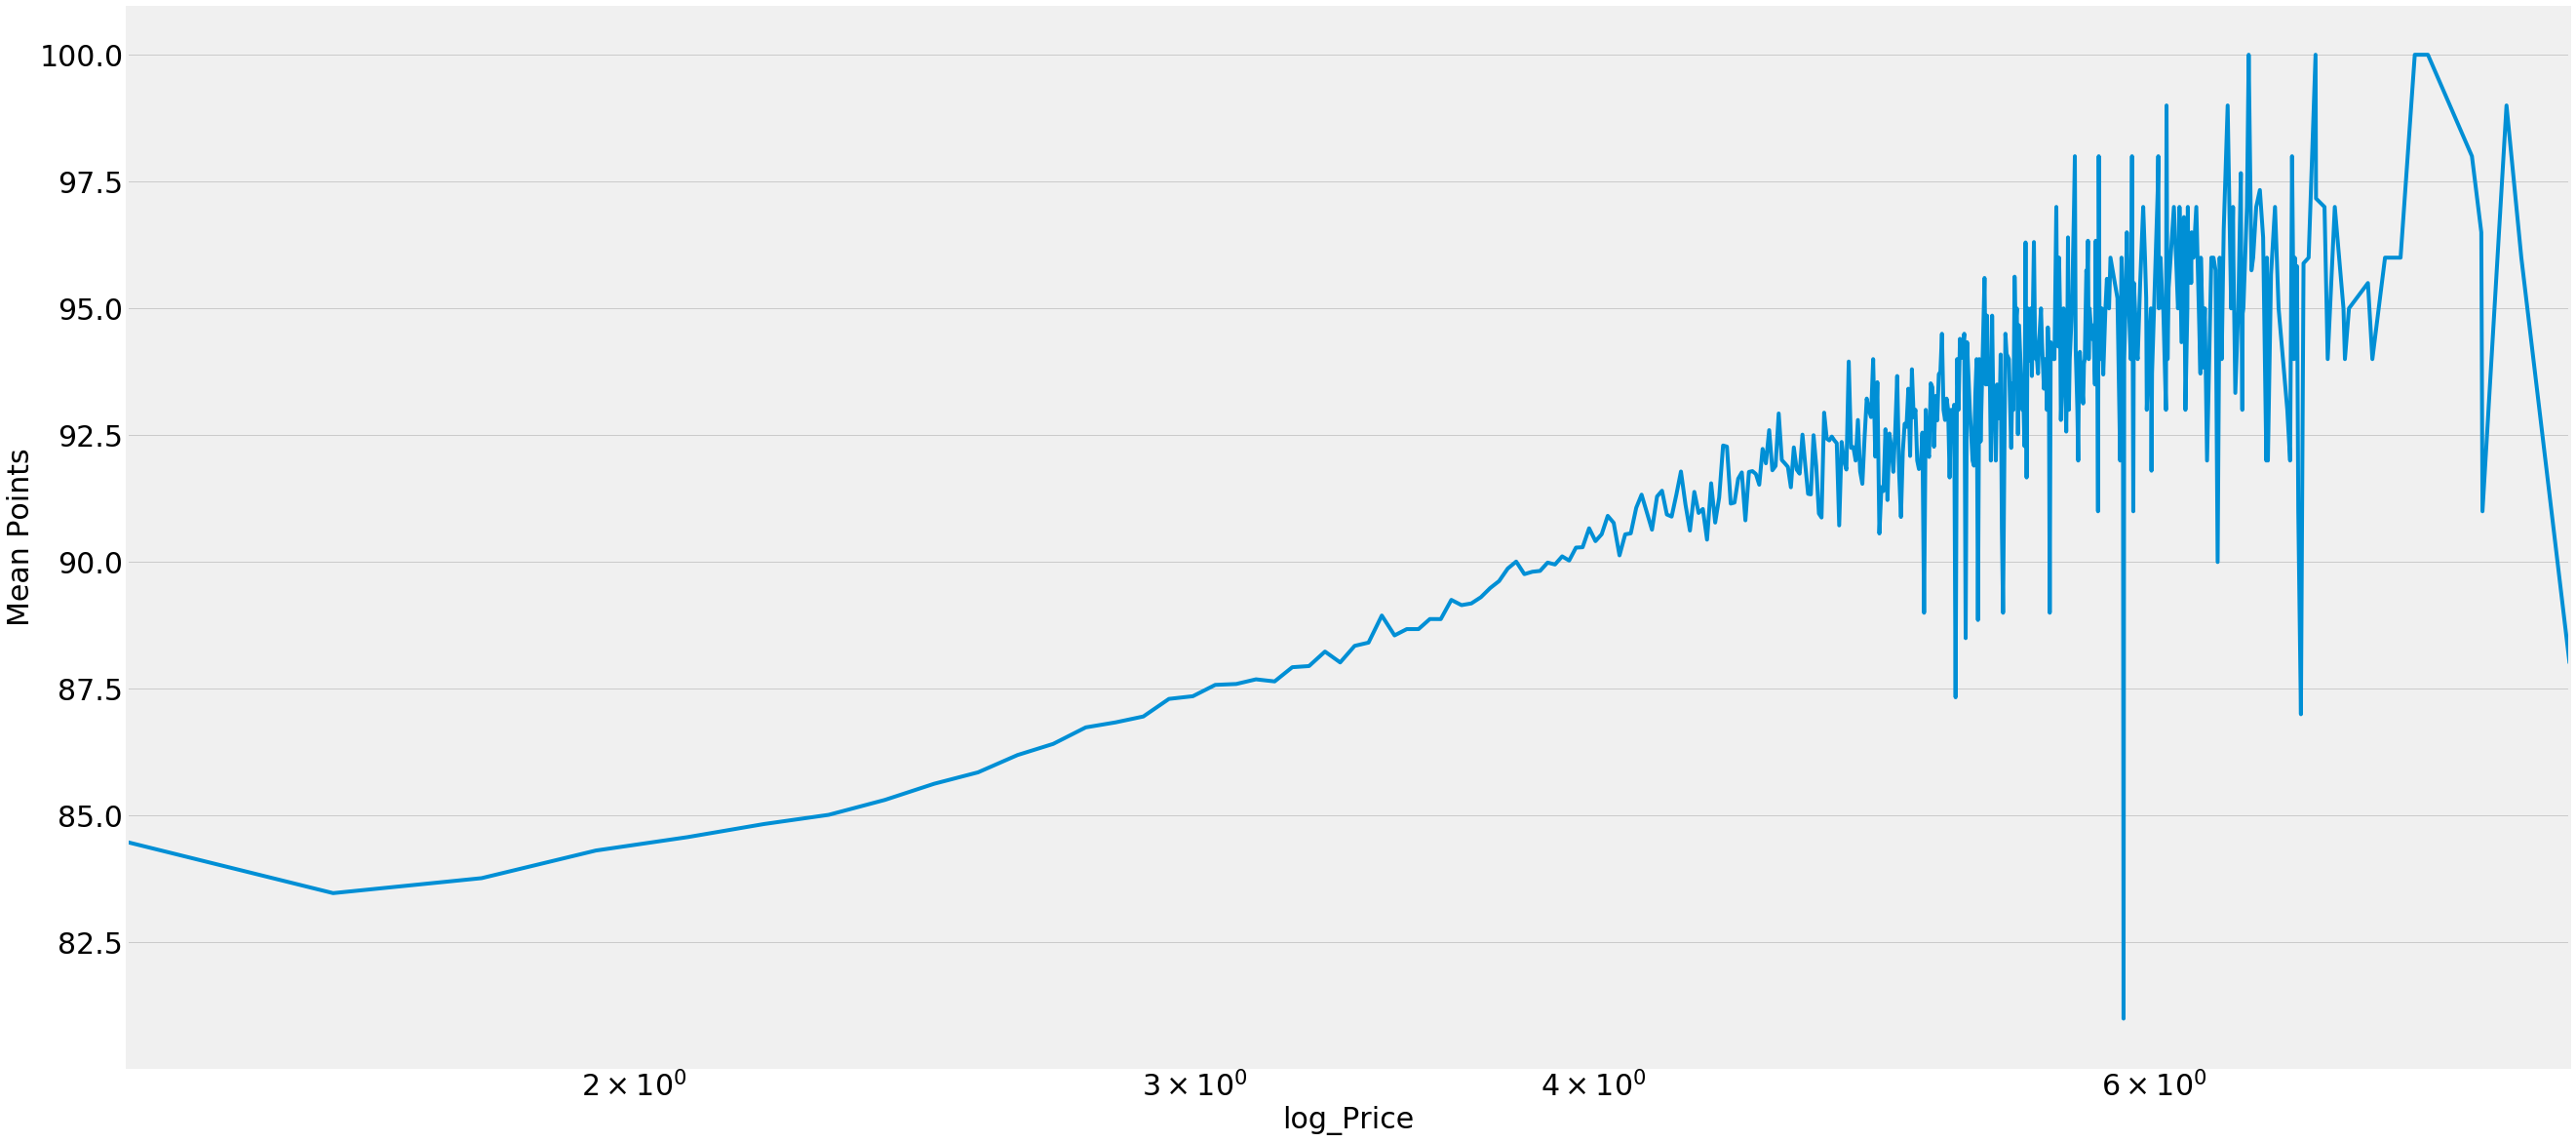

In [122]:
plt.figure()
df_wines.groupby(['log_price'])['points'].mean().plot(figsize=(40,20), fontsize = 30, logx = True)
plt.xlabel('log_Price', fontsize = 30)
plt.ylabel('Mean Points', fontsize = 30)
plt.show()

In [123]:
len(df_wines['description'])

280901

In [124]:
df_wines['description_length'] = df_wines['description'].apply(lambda x: len(x))

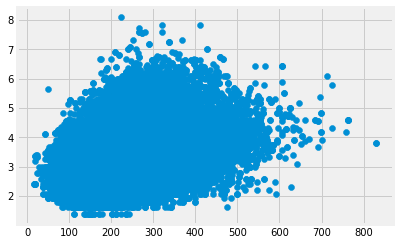

In [132]:
plt.scatter(df_wines['description_length'], df_wines['log_price'])

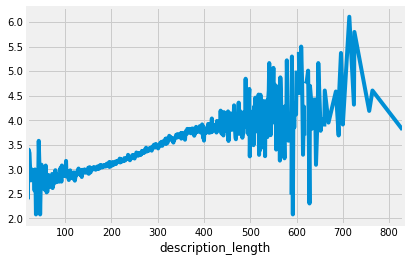

In [125]:
df_wines.groupby('description_length').mean()['log_price'].plot()

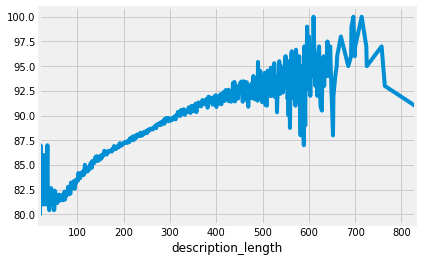

In [126]:
df_wines.groupby('description_length').mean()['points'].plot()

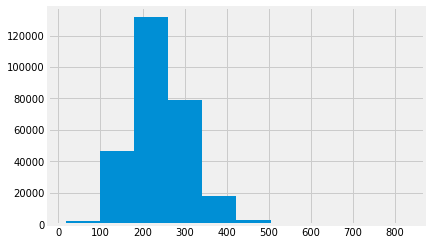

In [127]:
df_wines['description_length'].hist()

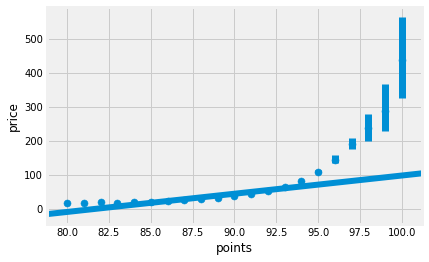

In [128]:
sns.regplot(x='points', y='price', x_estimator=np.mean, data=df_wines)

In [129]:
df_wines.dropna().head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,log_price,description_length
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,4.174387,249
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2.944439,243
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,3.091042,251
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,4.234107,259
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,3.912023,242
